# 1. Walkthrough

### 1.1 Programming For Data Analytics and Data Preparation Visualization

In [1]:

import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #heat map


In [2]:
df=pd.read_csv("Population_Estimates_202309.csv")

In [3]:
df.head(4)
# Exploratore Data Analysis
# Observe the data by using the head function

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
0,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,-,Both sexes,Thousand,61.1
1,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,1,Male,Thousand,31.4
2,PEA01,Population Estimates (Persons in April),1950,1950,200,Under 1 year,2,Female,Thousand,29.7
3,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,-,Both sexes,Thousand,NaN


In [4]:
df.tail(4)
# Exploratore Data Analysis
# Observe the data by using the tail function

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
5990,PEA01,Population Estimates (Persons in April),2023,2023,630,85 years and over,2,Female,Thousand,53.9
5991,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,-,Both sexes,Thousand,5281.6
5992,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,1,Male,Thousand,2606.2
5993,PEA01,Population Estimates (Persons in April),2023,2023,-,All ages,2,Female,Thousand,2675.4


In [5]:
df.count()

STATISTIC          5994
STATISTIC Label    5994
TLIST(A1)          5994
Year               5994
C02076V02508       5994
Age Group          5994
C02199V02655       5994
Sex                5994
UNIT               5994
VALUE              5880
dtype: int64

In [6]:
df.describe(include=object)

,STATISTIC,STATISTIC Label,C02076V02508,Age Group,C02199V02655,Sex,UNIT
count,5994,5994,5994,5994,5994,5994,5994
unique,1,1,27,27,3,3,1
top,PEA01,Population Estimates (Persons in April),200,Under 1 year,-,Both sexes,Thousand
freq,5994,5994,222,222,1998,1998,5994


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        5994 non-null   object 
 1   STATISTIC Label  5994 non-null   object 
 2   TLIST(A1)        5994 non-null   int64  
 3   Year             5994 non-null   int64  
 4   C02076V02508     5994 non-null   object 
 5   Age Group        5994 non-null   object 
 6   C02199V02655     5994 non-null   object 
 7   Sex              5994 non-null   object 
 8   UNIT             5994 non-null   object 
 9   VALUE            5880 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 468.4+ KB


In [8]:
df = df.drop(['STATISTIC', 'STATISTIC Label', 'Year', 'UNIT', 'C02199V02655'], axis=1)
df.head(4)

# Dropping irrelevant columns

,TLIST(A1),C02076V02508,Age Group,Sex,VALUE
0,1950,200,Under 1 year,Both sexes,61.1
1,1950,200,Under 1 year,Male,31.4
2,1950,200,Under 1 year,Female,29.7
3,1950,205,0 - 4 years,Both sexes,NaN


In [9]:
df = df.rename(columns={'TLIST(A1)':'Year', 'C02076V02508' : 'Age Group_Code', 'Age Group' : 'Age_Group', 'C02199V02655' : 'Sex_Code', 'UNIT' : 'Unit', 'VALUE' : 'Value', 'C02199V02655' : 'Sex_Code', 'UNIT' : 'Unit', 'VALUE' : 'Value'})
df.head(5)

#Renaming the column names


,Year,Age Group_Code,Age_Group,Sex,Value
0,1950,200,Under 1 year,Both sexes,61.1
1,1950,200,Under 1 year,Male,31.4
2,1950,200,Under 1 year,Female,29.7
3,1950,205,0 - 4 years,Both sexes,NaN
4,1950,205,0 - 4 years,Male,NaN


In [10]:
print(df.isnull().sum())

# Total number of missing values per column

Year                0
Age Group_Code      0
Age_Group           0
Sex                 0
Value             114
dtype: int64


In [11]:
df.dropna(axis=0,inplace=True)
df.head(7)
# How to remove rows with missing values

,Year,Age Group_Code,Age_Group,Sex,Value
0,1950,200,Under 1 year,Both sexes,61.1
1,1950,200,Under 1 year,Male,31.4
2,1950,200,Under 1 year,Female,29.7
6,1950,215,0 - 14 years,Both sexes,851.2
7,1950,215,0 - 14 years,Male,434.6
8,1950,215,0 - 14 years,Female,416.6
9,1950,225,1 - 4 years,Both sexes,249.1


In [12]:
df.shape

(5880, 5)

In [28]:
def plot_heatmap(csv_file):
    # Read the CSV file into a DataFrame
    # data = pd.read_csv(csv_file)
    
    # Create a pivot table for the heatmap
    pivot_table = df.pivot_table(index='Year', columns='Sex', values='Value')
    
    # Create the heatmap using Seaborn
    plt.figure(figsize=(25, 18))
    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
    
    # Customize the plot
    plt.title('Population Estimates Heatmap')
    plt.xlabel('Sex')
    plt.ylabel('Year')
    
    # Show the heatmap
    plt.show()


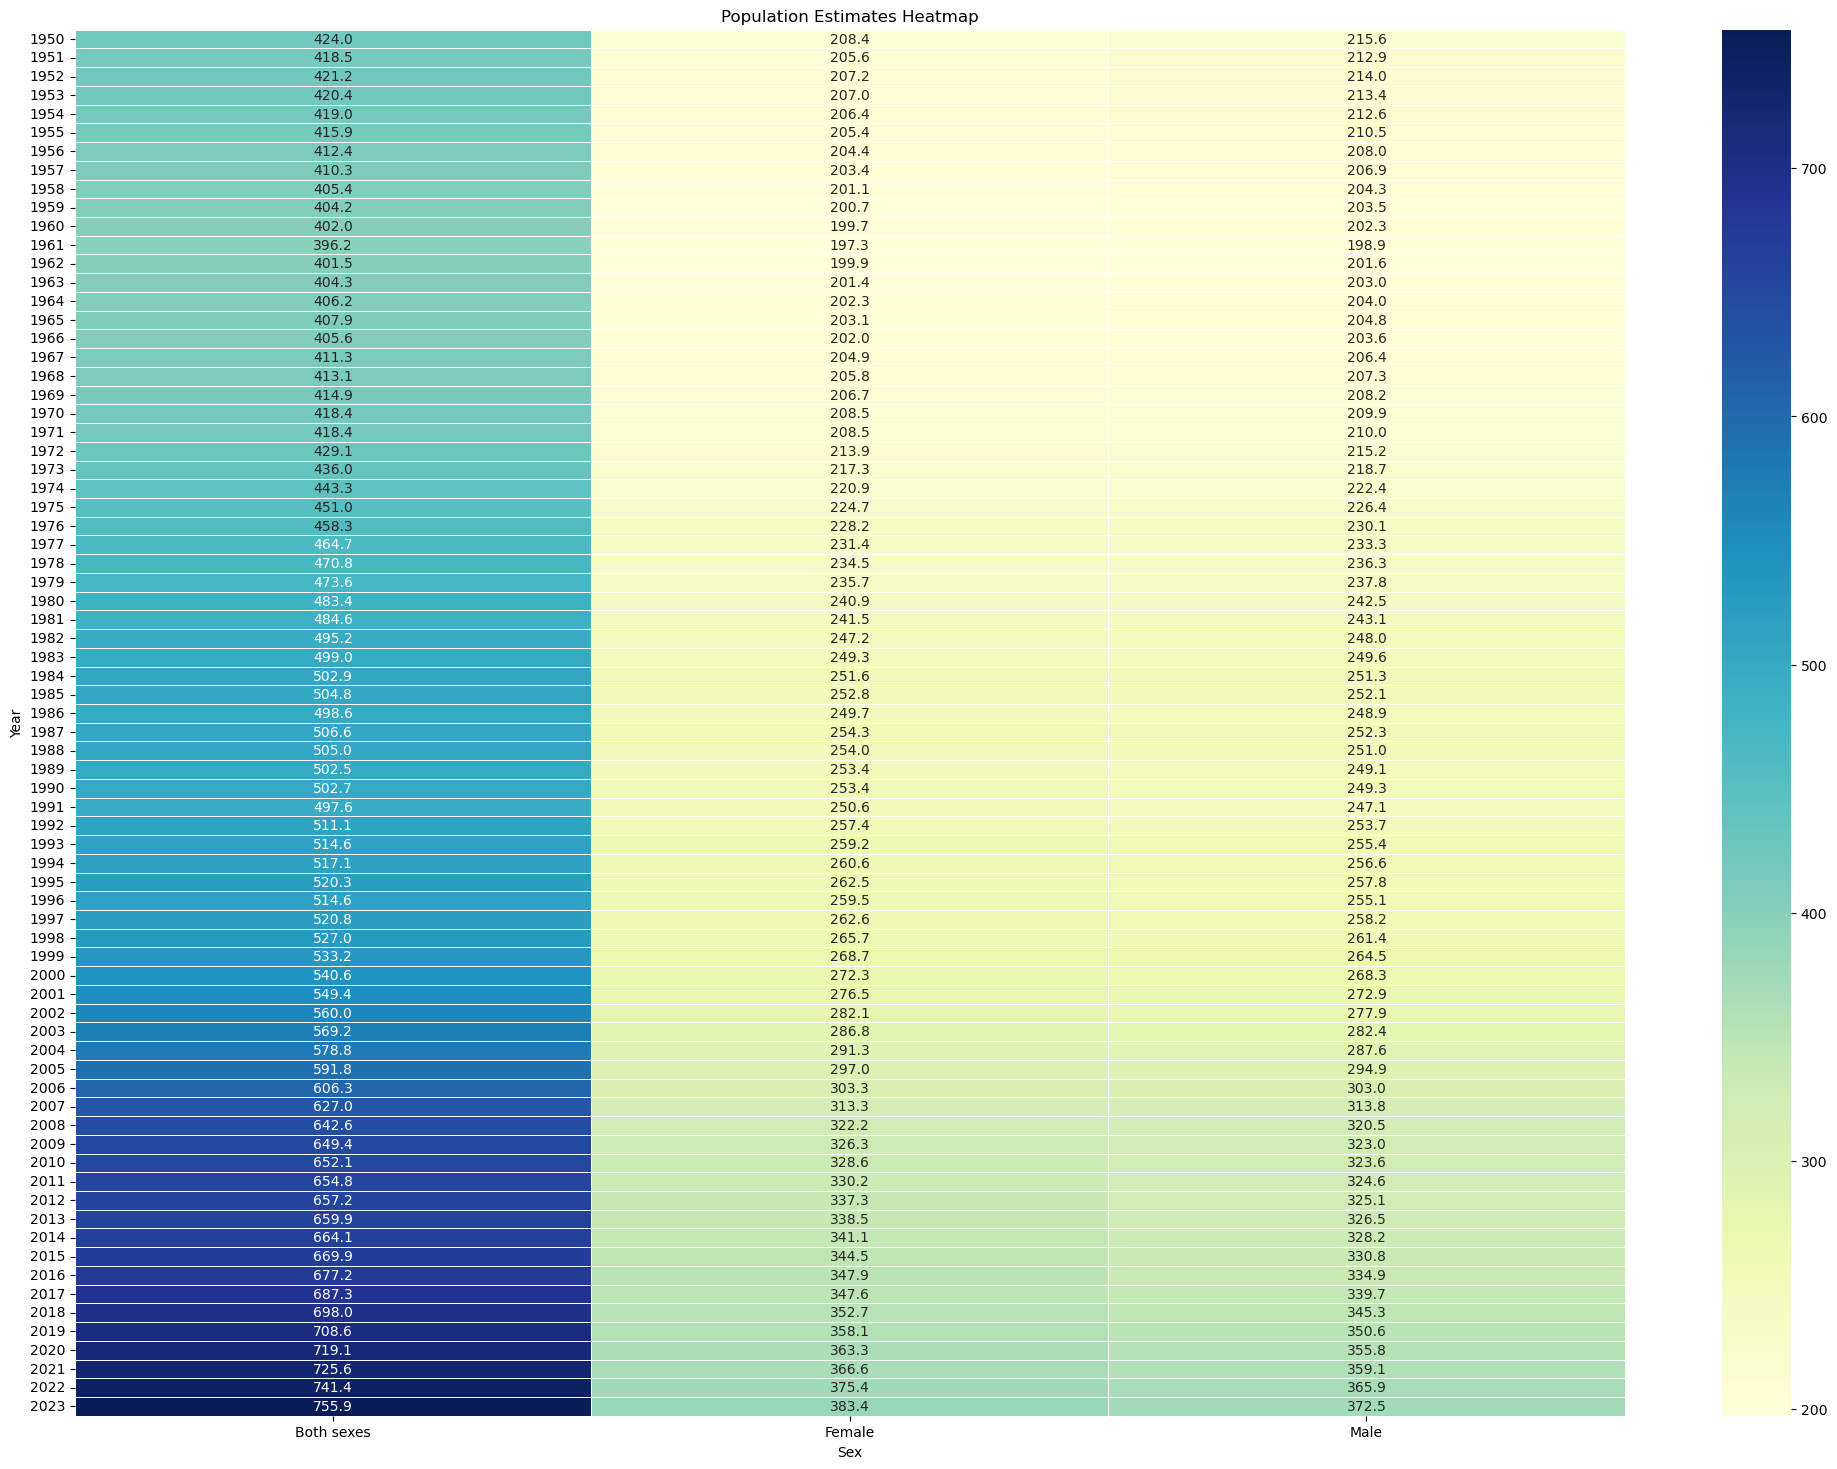

In [29]:
csv_file = 'Population_Estimates_202309.CSV'
plot_heatmap(csv_file)


### What is the current population of Ireland? - Visualization

In [15]:
df.tail(3)
# Exploratore Data Analysis
# Observe the data by using the tail function

,Year,Age Group_Code,Age_Group,Sex,Value
5991,2023,-,All ages,Both sexes,5281.6
5992,2023,-,All ages,Male,2606.2
5993,2023,-,All ages,Female,2675.4


In [16]:
# Assuming 'Year' is the column with the year and 'Data' is the column you want to work with
year_to_isolate = 2023  # Replace with the year you want to isolate

# Filter the DataFrame to isolate the data for the specific year
data_for_specific_year = df[df['Year'] == year_to_isolate]
data_for_specific_year

,Year,Age Group_Code,Age_Group,Sex,Value
5913,2023,200,Under 1 year,Both sexes,55.7
5914,2023,200,Under 1 year,Male,27.4
5915,2023,200,Under 1 year,Female,28.3
5916,2023,205,0 - 4 years,Both sexes,293.8
5917,2023,205,0 - 4 years,Male,149.2
...,...,...,...,...,...
5989,2023,630,85 years and over,Male,33.1
5990,2023,630,85 years and over,Female,53.9
5991,2023,-,All ages,Both sexes,5281.6
5992,2023,-,All ages,Male,2606.2


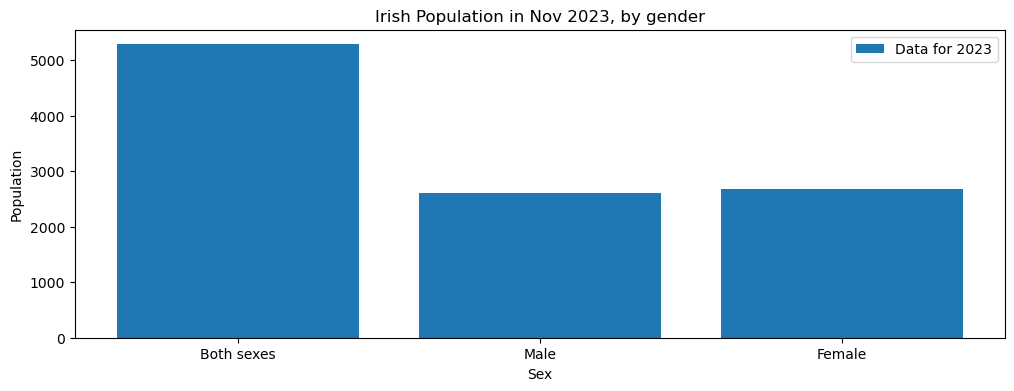

In [17]:
import matplotlib.pyplot as plt

# Create a line plot of the data for the specific year

plt.figure(figsize=(12, 4))  # Set the figure size
plt.bar(data_for_specific_year['Sex'], data_for_specific_year['Value'], label='Data for 2023')
plt.xlabel('Sex')
plt.ylabel('Population')
plt.title('Irish Population in Nov 2023, by gender')
plt.legend()
plt.show()

#### How has it changed over the past decade? 

In [18]:
def visualize_changes_and_growth(data):
    # Filter data for the years between 1950 and 2023
    filtered_data = data[(data["Year"] >= 1950) & (data["Year"] <= 2023)]

    # Pivot the data to have "Sex" as columns and "Year" as the index
    pivoted_data = filtered_data.pivot(index="Year", columns="Sex", values="Value")

    # Create a line chart to visualize the changes and growth over time
    plt.figure(figsize=(6, 3))
    
    # Calculate the percentage growth from the initial year (1950)
    for sex in pivoted_data.columns:
        initial_value = pivoted_data[sex].iloc[0]
        percentage_growth = (pivoted_data[sex] - initial_value) / initial_value * 100
        plt.plot(pivoted_data.index, percentage_growth, label=sex)

    plt.title("Percentage of Growth by Year (1950-2023)")
    plt.xlabel("Year")
    plt.ylabel("Percentage Growth")
    plt.legend()
    plt.grid(True)
    plt.show()


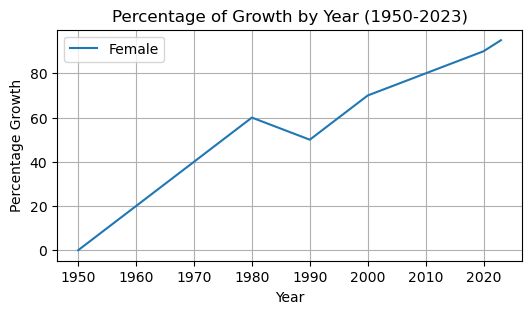

In [19]:
# Sample data (replace this with your actual data)
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female", "Female"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})

# Call the function to visualize changes and growth over time
visualize_changes_and_growth(data)


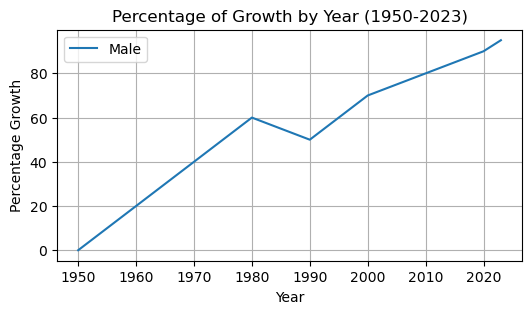

In [20]:
# Sample data (replace this with your actual data)
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male", "Male"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})

# Call the function to visualize changes and growth over time
visualize_changes_and_growth(data)


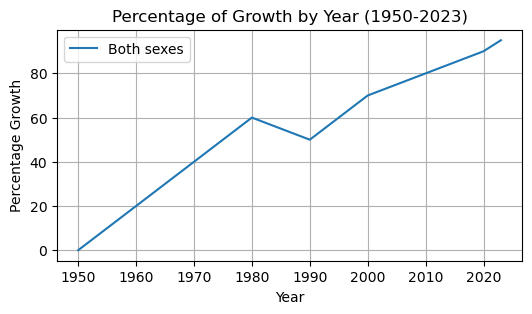

In [21]:
# Sample data (replace this with your actual data)
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})

# Call the function to visualize changes and growth over time
visualize_changes_and_growth(data)


In [22]:
def visualize_population_changes(data):
    # Filter data for the years between 1950 and 2023
    filtered_data = data[(data["Year"] >= 1950) & (data["Year"] <= 2023)]

    # Pivot the data to have "Sex" as columns and "Year" as the index
    pivoted_data = filtered_data.pivot(index="Year", columns="Sex", values="Value")

    # Create a line chart to visualize the population changes over time
    plt.figure(figsize=(10, 4))
    
    for sex in pivoted_data.columns:
        plt.plot(pivoted_data.index, pivoted_data[sex], label=sex)

    plt.title("Population Changes by Year (1950-2023)")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.legend()
    plt.grid(True)
    plt.show()


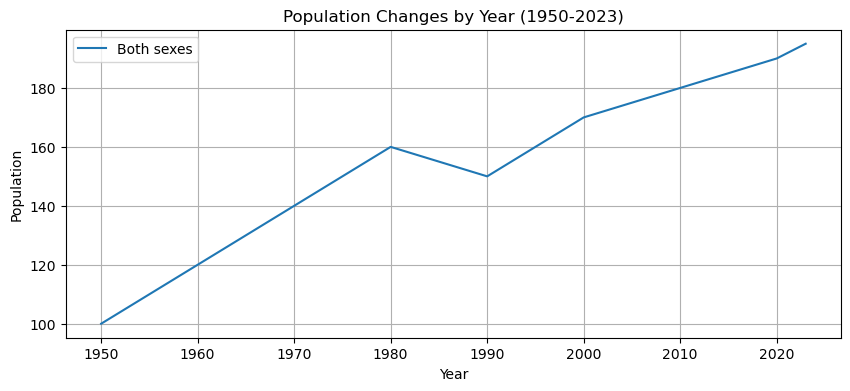

In [23]:
# Sample data (replace this with your actual data)
data = pd.DataFrame({
    "Year": [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2023],
    "Sex": ["Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes", "Both sexes"],
    "Value": [100, 120, 140, 160, 150, 170, 180, 190, 195]
})

# Call the function to visualize population changes over time
visualize_population_changes(data)


### 1.2 Machine Learning and Statistics for Data Analytics

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df.head(4)

,Year,Age Group_Code,Age_Group,Sex,Value
0,1950,200,Under 1 year,Both sexes,61.1
1,1950,200,Under 1 year,Male,31.4
2,1950,200,Under 1 year,Female,29.7
6,1950,215,0 - 14 years,Both sexes,851.2
